/opt/scitools/conda/deployments/default-2023_10_10/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/scitools/conda/deployments/default-2023_10_10/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


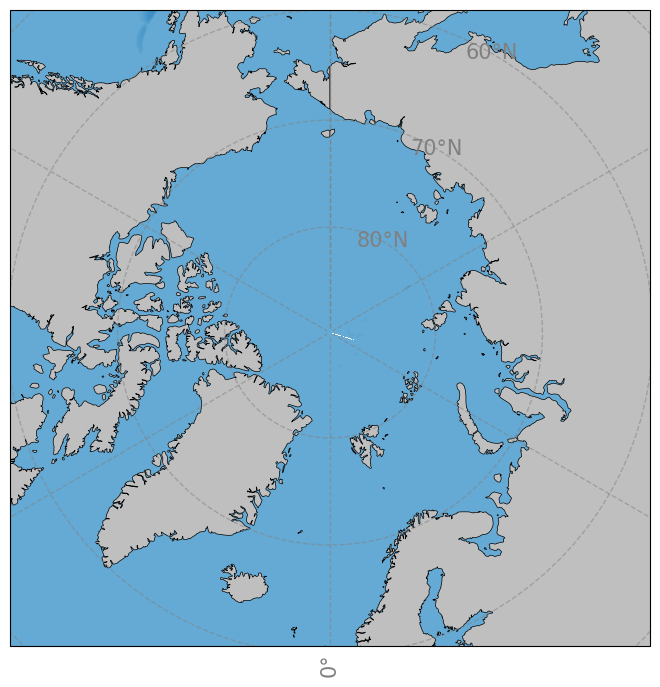

In [8]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import matplotlib.patches as patches

save_dir = '/home/h02/lroberts/ValidationTools/VALARC/FIGURES/'

#obs_dir = '/data/users/smoreton/Obs/NA_overflows/'

# regions to mark
FRAM = patches.Rectangle((-79, 10), 10, 7, linewidth=3, edgecolor='navy', facecolor='none')
#newf = patches.Rectangle((-43, 45), 6, 5, linewidth=3, edgecolor='navy', facecolor='none')
#subpg = patches.Rectangle((-60, 48), 40, 24, linewidth=3, edgecolor='navy', facecolor='none')


MSKPATH='/home/h02/lroberts/Documents/MESH_MASK/'
ds = xr.open_dataset(MSKPATH+'bathymetry_eORCA025-GO6.nc')
    
#cropping to ARCTIC
min_lon = -165.
max_lon = 175.

min_lat = 45.
max_lat = 90.

mask_lon = (ds.nav_lon >= min_lon) & (ds.nav_lon <= max_lon)
mask_lat = (ds.nav_lat >= min_lat) & (ds.nav_lat <= max_lat)

ds_NA = ds.where(mask_lon & mask_lat, drop=True)

def add_land_features(ax,cfeature_lst):
# get isf groiunding line, ice shelf front and coastline
    for ifeat,cfeat in enumerate(cfeature_lst):
        if cfeat=='isf':
            #feature = cartopy.feature.NaturalEarthFeature('physical', 'antarctic_ice_shelves_polys', '50m',facecolor='0.75',edgecolor='k') # global plot
            feature = cartopy.feature.NaturalEarthFeature('physical', 'antarctic_ice_shelves_polys', '50m',facecolor='none',edgecolor='k')
        elif cfeat=='lakes':
            feature = cartopy.feature.NaturalEarthFeature('physical', 'lakes'                      , '50m',facecolor='none',edgecolor='k')
        elif cfeat=='coast':
            feature = cartopy.feature.NaturalEarthFeature('physical', 'coastline'                  , '50m',facecolor='0.75',edgecolor='k')
        elif cfeat=='land':
            feature = cartopy.feature.NaturalEarthFeature('physical', 'land'                       , '50m',facecolor='0.75',edgecolor='k')
        elif cfeat=='bathy_z1000':
            feature = cartopy.feature.NaturalEarthFeature('physical', 'bathymetry_J_1000'          , '10m',facecolor='none',edgecolor='k')
        elif cfeat=='bathy_z2000':
            feature = cartopy.feature.NaturalEarthFeature('physical', 'bathymetry_I_2000'          , '10m',facecolor='none',edgecolor='k')
        elif cfeat=='bathy_z3000':
            feature = cartopy.feature.NaturalEarthFeature('physical', 'bathymetry_H_3000'          , '10m',facecolor='none',edgecolor='k')
        else:
            print('feature unknown : '+cfeat)
            sys.exit(42)
        ax.add_feature(feature,linewidth=0.5)

proj=ccrs.Stereographic(central_latitude=90.0, central_longitude=0.0)
XY_lim=[-180, 180, 90, 60]
plt.figure(figsize=np.array([210, 210]) / 25.4)
ax=plt.subplot(1, 1, 1, projection=proj)
#ax=plt.subplot(1, 1, 1)
add_land_features(ax,['isf','lakes','land'])

#fig = plt.figure(figsize=np.array([175, 175]) / 25.4)

#ax = plt.axes(projection=ccrs.PlateCarree())
#fig.tight_layout()


p = ax.contourf(ds_NA.nav_lon.values, ds_NA.nav_lat.values, ds_NA.Bathymetry.values, 60,
             transform=ccrs.PlateCarree(), cmap='Blues', extend='both')

#ax.coastlines()
#ax.set_extent([90, -1, 50, 90])

#ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_patch(FRAM)
#ax.add_patch(newf)
#ax.add_patch(subpg)

#ax.axhline(26.5, c='navy', linewidth=3)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabels_top = False
gl.ylabels_right = False

ax.set_extent(XY_lim, ccrs.PlateCarree())
plt.savefig(save_dir + 'box_ARCTIC.png', dpi=200)

/opt/scitools/conda/deployments/default-2023_10_10/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/scitools/conda/deployments/default-2023_10_10/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


<Figure size 640x480 with 0 Axes>